In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1354.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_612.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1748.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_236.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1996.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1703.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_111.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1393.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1098.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/

In [6]:
import os
from PIL import Image
import numpy as np

In [7]:
dataset_dir = '/kaggle/input/the-healthcare-dataset'
image_files = []

for dirname, _, filenames in os.walk(dataset_dir):
    class_name = os.path.basename(dirname)
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_files.append((class_name, os.path.join(dirname, filename)))

print(f"Total images found: {len(image_files)}")
print("Sample:", image_files[:5])

Total images found: 20172
Sample: [('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1354.png'), ('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_612.png'), ('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1748.png'), ('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_236.png'), ('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1996.png')]


In [8]:
map_counts = []
map_brightness = []

for class_name, filepath in image_files:
    # Map for counting images
    map_counts.append((class_name, 1))
    
    # Map for brightness
    img = Image.open(filepath).convert("L")  # grayscale
    brightness = np.mean(np.array(img))
    map_brightness.append((class_name, brightness))

In [9]:
reduce_counts = {}
for class_name, value in map_counts:
    reduce_counts[class_name] = reduce_counts.get(class_name, 0) + value

In [10]:
brightness_sums = {}
brightness_counts = {}

In [11]:
for class_name, brightness in map_brightness:
    brightness_sums[class_name] = brightness_sums.get(class_name, 0) + brightness
    brightness_counts[class_name] = brightness_counts.get(class_name, 0) + 1

average_brightness = {cls: brightness_sums[cls] / brightness_counts[cls] for cls in brightness_sums}

In [12]:
print("\nNumber of images per class:")
for cls, count in reduce_counts.items():
    print(f"{cls}: {count}")


Number of images per class:
4 1 Ophthalmic Retinal Imaging: 1000
2 3 Lymphatic Tissue: 1000
1 2 Benign Melanocytic Lesions: 1004
2 7 Stromal Tissue: 1000
2 5 Muscular Tissue: 1000
2 4 Mucosal Tissue: 1000
5 5 Dental Radiographic Imaging: 1000
2 1 Cervical Cytopathological Imaging: 1000
5 1 Capsule Endoscopic Imaging: 1077
1 1 Benign Keratotic Lesions: 1000
5 3 Normal-Z-Esophagitis: 1000
5 2 Dyed-Polyps-Margins: 1013
1 4 Pre-Cancerous Lesions: 1109
5 4 Ulcerative Colitis Polyps: 1000
3 2 Thoracic Radiographic Imaging: 1000
2 6 Normal Tissue: 1000
1 3 Malignant Lesions: 996
2 2 Adipose Tissue: 1000
3 1 Orthopedic Radiographic Imaging: 973
2 8 Tumor Tissue: 1000


In [13]:
print("\nAverage brightness per class:")
for cls, avg in average_brightness.items():
    print(f"{cls}: {avg:.2f}")


Average brightness per class:
4 1 Ophthalmic Retinal Imaging: 144.42
2 3 Lymphatic Tissue: 145.96
1 2 Benign Melanocytic Lesions: 153.19
2 7 Stromal Tissue: 158.18
2 5 Muscular Tissue: 159.23
2 4 Mucosal Tissue: 172.06
5 5 Dental Radiographic Imaging: 105.14
2 1 Cervical Cytopathological Imaging: 169.26
5 1 Capsule Endoscopic Imaging: 86.83
1 1 Benign Keratotic Lesions: 142.16
5 3 Normal-Z-Esophagitis: 121.83
5 2 Dyed-Polyps-Margins: 80.01
1 4 Pre-Cancerous Lesions: 134.81
5 4 Ulcerative Colitis Polyps: 84.19
3 2 Thoracic Radiographic Imaging: 121.95
2 6 Normal Tissue: 155.09
1 3 Malignant Lesions: 137.17
2 2 Adipose Tissue: 202.33
3 1 Orthopedic Radiographic Imaging: 65.80
2 8 Tumor Tissue: 146.00


In [ ]:
features = []
labels = []

for class_name, filepath in image_files:
    img = Image.open(filepath).convert("L").resize((64, 64))  # resize to reduce dimensionality
    hist = np.histogram(np.array(img).flatten(), bins=64, range=(0, 256))[0]  # 64-bin histogram
    features.append(hist)
    labels.append(class_name)

features = np.array(features)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [14]:
from sklearn.cluster import KMeans

num_clusters = 20  # you can try 20 to match original classes
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_scaled)

cluster_labels = kmeans.labels_

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(labels, cluster_labels)
nmi = normalized_mutual_info_score(labels, cluster_labels)

print(f"ARI: {ari:.2f}, NMI: {nmi:.2f}")

ARI: 0.16, NMI: 0.37


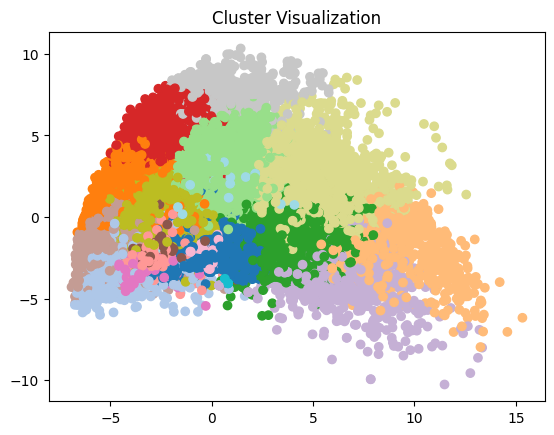

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

plt.scatter(features_2d[:,0], features_2d[:,1], c=cluster_labels, cmap='tab20')
plt.title("Cluster Visualization")
plt.show()

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

2025-10-05 12:25:00.180925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759667100.446512      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759667100.529185      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% validation
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),  # resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

NameError: name 'dataset_dir' is not defined

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


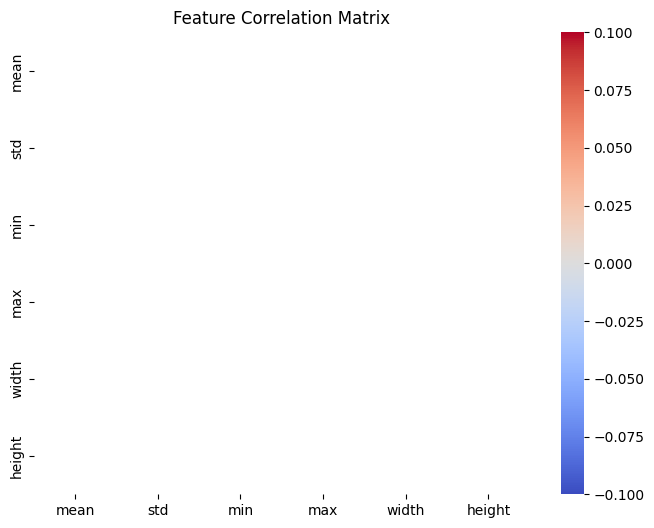

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()